In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
def frange(start, stop, step):
     x = start
     while x < stop:
         yield x
         x += step

In [3]:
x = pd.read_csv('data_week_X.csv', ',').as_matrix()
y = pd.read_csv('data_week_Y.csv', ',').as_matrix()
Y = []
for i in range(np.size(y)):
    Y.append(y[i][0])
y = Y
print('check that X and Y arrays equal size')
print(np.size(x,0), np.size(y))
trainStart = 0
trainEnd = 1200
x_train = x[trainStart:trainEnd]
y_train = y[trainStart:trainEnd]
x_test = x[trainEnd:]
y_test = y[trainEnd:]
print('traning to test proportion')
print(np.size(x_train,0), np.size(x_test,0))

check that X and Y arrays equal size
1454 1454
traning to test proportion
1200 254


In [15]:
print('test size:', np.size(y_predict), 'number of crisis: ', sum(y_test))

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
recall = recall_score(y_test, y_predict, average='binary')
precision = precision_score(y_test, y_predict, average='binary')
print(sum(y_predict), recall, precision)
print(y_predict)

test size: 254 number of crisis:  12


245 1.0 0.0489795918367
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [16]:
for w in frange(0, 0.3, 0.01):
    clf = LogisticRegression(class_weight={0: w, 1: 1-w})
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    res = recall_score(y_test, y_predict, average='binary')
    random = round(sum(y_predict)/len(y_test), 3)
    print('%.2f \t' % random,'%.3f\t' % round(res, 3), sum(y_predict), 'win over random = ', res-random)

1.00 	 1.000	 254 win over random =  0.0
1.00 	 1.000	 254 win over random =  0.0
1.00 	 1.000	 254 win over random =  0.0
0.97 	 0.917	 247 win over random =  -0.0553333333333
0.96 	 0.917	 245 win over random =  -0.0483333333333
0.96 	 0.917	 245 win over random =  -0.0483333333333
0.96 	 0.917	 244 win over random =  -0.0443333333333
0.96 	 0.917	 244 win over random =  -0.0443333333333
0.94 	 0.917	 238 win over random =  -0.0203333333333
0.88 	 0.917	 223 win over random =  0.0386666666667
0.82 	 0.667	 208 win over random =  -0.152333333333
0.79 	 0.667	 201 win over random =  -0.124333333333
0.73 	 0.583	 185 win over random =  -0.144666666667
0.62 	 0.583	 157 win over random =  -0.0346666666667
0.12 	 0.167	 31 win over random =  0.0446666666667
0.26 	 0.167	 66 win over random =  -0.0933333333333
0.16 	 0.083	 40 win over random =  -0.0736666666667
0.10 	 0.083	 26 win over random =  -0.0186666666667
0.07 	 0.000	 17 win over random =  -0.067
0.04 	 0.000	 9 win over random =

2 win over random =  -0.008
0.01 	 0.000	 2 win over random =  -0.008
0.01 	 0.000	 2 win over random =  -0.008
0.01 	 0.000	 2 win over random =  -0.008


In [17]:
clf = LogisticRegression(class_weight={0: 0.1, 1: 0.9})
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(y_predict)
clf = SVC()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
res = recall_score(y_test, y_predict, average='binary')
print(sum(y_predict), sum(y_test))
print(res)

[1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
0 12
0.0


In [18]:
clf = MLPClassifier( alpha=100, random_state=13, max_iter=1000)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
recall = recall_score(y_test, y_predict, average='binary')
precision = precision_score(y_test, y_predict, average='binary')
accuracy = accuracy_score(y_test, y_predict)
print(np.size(y_predict), sum(y_predict), sum(y_test))
print('%.2f \t' % round(recall, 3), '%.2f \t' % round(precision, 3), '%.2f \t' % round(accuracy, 3))

254 27 12
0.17 	 0.07 	 0.86 	


frequence of crises prediction: 0.41 	 all crisis:  12
recall 0.58 	 precision 0.07 	
improve over statistical random: 0.18 	
accuracy 0.60 	


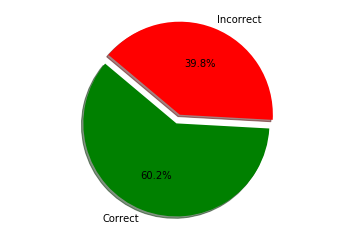

missed crises: 

 5


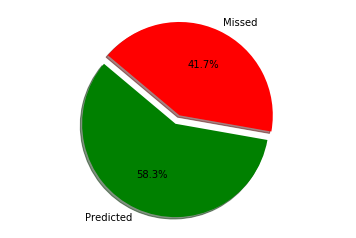

In [20]:
resRecall = 0
for i in range(10):
    for n in range(1,50,5):
        for w in frange(0, 0.17, 0.005):
            for r in range(1,20,1):
                clf = RandomForestClassifier(n_estimators=n)
                clf.fit(x_train, y_train)
                y_predict_1 = clf.predict(x_test)
                
                clf = LogisticRegression(class_weight={0: w, 1: 1-w})
                clf.fit(x_train, y_train)
                y_predict_2 = clf.predict(x_test)
                
                clf = MLPClassifier(solver='lbfgs', alpha=0.01, random_state=r, max_iter=1000)
                clf.fit(x_train, y_train)
                y_predict_3 = clf.predict(x_test)
                y_predict = []
                for i in range(np.size(y_predict_1)):
                    y_predict.append((y_predict_1[i] + y_predict_2[i] + y_predict_3[i])/3.0)
                    if y_predict[i] > 0.4:
                        y_predict[i] = 1
                    else:
                        y_predict[i] = 0
                        
                recall = recall_score(y_test, y_predict, average='binary')
                if recall > resRecall and sum(y_predict)< 125:
                    resRecall = recall
                    print(recall, sum(y_predict), n, w, r)
    print(i)
print('result', resRecall)

frequence of crises prediction: 0.41 	 all crisis:  12
recall 0.58 	 precision 0.07 	
improve over statistical random: 0.18 	
accuracy 0.60 	


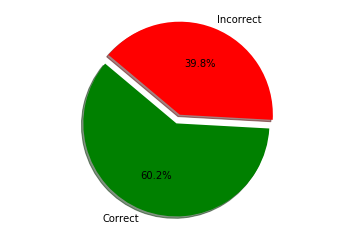

missed crises: 

 5


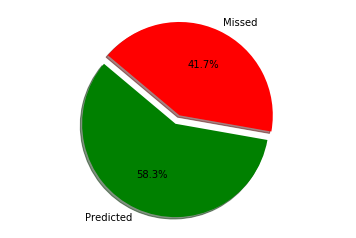

In [41]:
n = 150
w = 0.1325
r = 7
clf = RandomForestClassifier(n_estimators=n)
clf.fit(x_train, y_train)
y_predict_1 = clf.predict(x_test)

clf = LogisticRegression(class_weight={0: w, 1: 1-w})
clf.fit(x_train, y_train)
y_predict_2 = clf.predict(x_test)

clf = MLPClassifier(solver='lbfgs', alpha=0.01, random_state=r, max_iter=1000)
clf.fit(x_train, y_train)
y_predict_3 = clf.predict(x_test)
y_predict = []
for i in range(np.size(y_predict_1)):
    y_predict.append((y_predict_1[i] + y_predict_2[i] + y_predict_3[i])/3.0)
    if y_predict[i] > 0.4:
        y_predict[i] = 1
    else:
        y_predict[i] = 0
        
recall = recall_score(y_test, y_predict, average='binary')
precision = precision_score(y_test, y_predict, average='binary')
accuracy = accuracy_score(y_test, y_predict)
print('frequence of crises prediction: %.2f \t' % round(sum(y_predict)/np.size(y_predict),2), 'all crisis: ', sum(y_test))
print('recall %.2f \t' % round(recall, 3), 'precision %.2f \t' % round(precision, 3)) # the percent of crises, which was correctly predicted
print('improve over statistical random: %.2f \t' % round(recall - sum(y_predict)/np.size(y_predict),3))
print('accuracy %.2f \t' % round(accuracy, 3)) # the percent of crises, which was correctly predicted



labels = 'Correct', 'Incorrect'
sizes = [accuracy * np.size(y_test), (1 - accuracy) * np.size(y_test)]
colors = ['green', 'red']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

missed=0
for i in range(254):
    if (y_test[i] - y_predict[i]) == 1:
        missed += 1
print('missed crises: ', missed)



labels2 = 'Predicted', 'Missed'
sizes2 = [sum(y_test) - missed, missed]
colors = ['green', 'red']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes2, explode=explode, labels=labels2, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()